In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

## Building the Word Vocabulary

In [2]:
data="Dans la ville d'Athy, un certain Jeremy Lanigan \n A travaillé jusqu'à ce qu'il n'ait plus une livre. \nSon père est mort et l'a fait redevenir un homme \n Lui laissant une ferme et dix acres de terre. \nIl a donné une grande fête pour ses amis et ses proches \n Qui ne l'ont pas oublié quand il est arrivé au mur, \nEt si vous écoutez bien, je ferai briller vos yeux \n Des rangées et des émeutes du Bal de Lanigan. \nMoi-même, bien sûr, j'ai reçu une invitation gratuite, \nPour toutes les jolies filles et tous les garçons que je pourrais inviter, \nEt en un instant, amis et proches \nDansaient joyeusement autour d'un fût. \nJudy O'Daly, cette gentille petite modiste, \nElle m'a fait un clin d'œil pour lui rendre visite, \nEt je suis vite arrivé avec Peggy McGilligan \nJuste à temps pour le Bal de Lanigan. \nIl y avait des lichettes de ponch et de vin pour les dames, \nPommes de terre et gâteaux ; il y avait du bacon et du thé, \nIl y avait les Nolans, les Dolans, les O'Gradys \nCourtisant les filles et dansant joyeusement. \nLes chansons tournaient en rond comme l'eau, \nLa harpe qui autrefois résonnait dans la vieille salle de Tara, \nLa douce Nelly Gray et La Fille du Piégeur de Rats, \nToutes ensemble à chanter au Bal de Lanigan. \nIls faisaient toutes sortes de polkas absurdes \nDans toute la salle en tourbillon. \nJulia et moi, nous avons chassé leurs bêtises \nEt leur avons donné le tour d'une gigue et d'une danse. \nAh, mon Dieu, comment les filles sont devenues folles de moi \nOnt dansé jusqu'à ce que vous pensiez que le plafond allait tomber. \nCar j'ai passé trois semaines à l'Académie Brooks \nÀ apprendre de nouveaux pas pour le Bal de Lanigan. \nTrois longues semaines passées à Dublin, \nTrois longues semaines à ne rien apprendre du tout, \nTrois longues semaines passées à Dublin, \nÀ apprendre de nouveaux pas pour le Bal de Lanigan. \nElle est sortie et je suis rentré à nouveau, \nJe suis sorti et elle est rentrée à nouveau, \nElle est sortie et je suis rentré à nouveau, \nApprenant de nouveaux pas pour le Bal de Lanigan. \nLes garçons étaient tous joyeux et les filles elles étaient en forme \nEt dansaient toutes en couples et en groupes, \nJusqu'à ce qu'un accident arrive, le jeune Terrance McCarthy \nMette sa jambe droite à travers les cerceaux de miss Finnerty. \nPauvre créature évanouie et criant Meelia murther, \nAppela ses frères et les rassembla tous. \nCarmody jura qu'il n'irait pas plus loin \nJusqu'à ce qu'il ait satisfaction au Bal de Lanigan. \nAu milieu de la bagarre, miss Kerrigan s'évanouit, \nSes joues en même temps rouges comme une rose. \nCertains des gars ont déclaré qu'elle était maquillée, \nElle avait pris un petit verre de trop, je suppose. \nSon fiancé, Ned Morgan, si puissant et capable, \nQuand il vit sa belle amie étendue contre le mur, \nArracha la jambe gauche de sous la table \nEt brisa tous les Chaneys au Bal de Lanigan. \nLes garçons, oh les garçons, c'est là qu'il y a eu des rixes. \nMoi-même, j'ai reçu un coup de Phelim McHugh. \nJ'ai vite répondu à son introduction \nEt j'ai déclenché un terrible vacarme. \nLe vieux Casey, le joueur de cornemuse, a failli être étranglé. \nIls lui ont serré les tuyaux, soufflets, chalumeaux et tout. \nLes filles, dans leurs rubans, elles se sont toutes emmêlées \nEt cela a mis fin au Bal de Lanigan."

In [3]:
corpus = data.lower().split("\n")
print(corpus)

["dans la ville d'athy, un certain jeremy lanigan ", " a travaillé jusqu'à ce qu'il n'ait plus une livre. ", "son père est mort et l'a fait redevenir un homme ", ' lui laissant une ferme et dix acres de terre. ', 'il a donné une grande fête pour ses amis et ses proches ', " qui ne l'ont pas oublié quand il est arrivé au mur, ", 'et si vous écoutez bien, je ferai briller vos yeux ', ' des rangées et des émeutes du bal de lanigan. ', "moi-même, bien sûr, j'ai reçu une invitation gratuite, ", 'pour toutes les jolies filles et tous les garçons que je pourrais inviter, ', 'et en un instant, amis et proches ', "dansaient joyeusement autour d'un fût. ", "judy o'daly, cette gentille petite modiste, ", "elle m'a fait un clin d'œil pour lui rendre visite, ", 'et je suis vite arrivé avec peggy mcgilligan ', 'juste à temps pour le bal de lanigan. ', 'il y avait des lichettes de ponch et de vin pour les dames, ', 'pommes de terre et gâteaux ; il y avait du bacon et du thé, ', "il y avait les nolans

In [4]:
#configurer le tokenizer pour qu'il prenne en compte les caractères spéciaux comme faisant partie d'un mot(francais)
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(f"word index dictionary: {tokenizer.word_index}")
print(f"total words: {total_words}")

word index dictionary: {'et': 1, 'de': 2, 'les': 3, 'à': 4, 'le': 5, 'la': 6, 'bal': 7, 'lanigan.': 8, 'pour': 9, 'un': 10, 'je': 11, 'en': 12, 'il': 13, 'au': 14, 'a': 15, 'une': 16, 'est': 17, 'pas': 18, 'des': 19, 'du': 20, "j'ai": 21, 'toutes': 22, 'elle': 23, 'dans': 24, "jusqu'à": 25, 'ce': 26, "qu'il": 27, 'ses': 28, 'filles': 29, 'suis': 30, 'y': 31, 'avait': 32, 'trois': 33, 'semaines': 34, 'son': 35, 'lui': 36, 'tous': 37, 'que': 38, 'ont': 39, 'apprendre': 40, 'nouveaux': 41, 'longues': 42, 'nouveau,': 43, 'plus': 44, 'fait': 45, 'donné': 46, 'amis': 47, 'proches': 48, 'qui': 49, 'ne': 50, 'quand': 51, 'arrivé': 52, 'mur,': 53, 'si': 54, 'vous': 55, 'moi-même,': 56, 'reçu': 57, 'garçons': 58, 'dansaient': 59, 'vite': 60, 'temps': 61, 'comme': 62, 'salle': 63, 'ils': 64, 'avons': 65, 'leurs': 66, "d'une": 67, 'sont': 68, 'passées': 69, 'dublin,': 70, 'sortie': 71, 'rentré': 72, 'étaient': 73, 'elles': 74, 'sa': 75, 'jambe': 76, 'miss': 77, 'garçons,': 78, 'ville': 79, "d'athy

## Preprocessing the Dataset

In [5]:
input_sequences = []
for line in corpus:
  # tokenize the currrent line
  token_list = tokenizer.texts_to_sequences([line])[0]
  # loop over the line in several times to generate subphrases
  for i in range(1,len(token_list)):
    # generate the subphrase
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
# Get the length of the longest line
max_len_sequence = max([len(x) for x in input_sequences])
#pad_all_sequence
input_sequence_padded = np.array(pad_sequences(input_sequences,maxlen=max_len_sequence,padding="pre"))


In [6]:
print(input_sequences[:7])
print("\n")
print(input_sequence_padded[:7])

[[24, 6], [24, 6, 79], [24, 6, 79, 80], [24, 6, 79, 80, 10], [24, 6, 79, 80, 10, 81], [24, 6, 79, 80, 10, 81, 82], [24, 6, 79, 80, 10, 81, 82, 83]]


[[ 0  0  0  0  0  0  0  0  0  0  0  0 24  6]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  6 79]
 [ 0  0  0  0  0  0  0  0  0  0 24  6 79 80]
 [ 0  0  0  0  0  0  0  0  0 24  6 79 80 10]
 [ 0  0  0  0  0  0  0  0 24  6 79 80 10 81]
 [ 0  0  0  0  0  0  0 24  6 79 80 10 81 82]
 [ 0  0  0  0  0  0 24  6 79 80 10 81 82 83]]


In [7]:
xs,labels = input_sequence_padded[:,:-1], input_sequence_padded[:,-1]
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [8]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)


sample sentence: ['dans', 'la', 'ville', "d'athy,", 'un', 'certain', 'jeremy', 'lanigan']
[24, 6, 79, 80, 10, 81, 82, 83]


In [9]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

token list: [ 0  0  0  0  0  0 24  6 79 80 10 81 82]
decoded to text: ["dans la ville d'athy, un certain jeremy"]


In [10]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 83


## Build the Model

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,output_dim=128,input_length = max_len_sequence-1),


    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.LSTM(64),

    tf.keras.layers.Dense(total_words,activation="softmax")]
)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 13, 128)           38784     
                                                                 
 bidirectional_10 (Bidirect  (None, 13, 128)           74496     
 ional)                                                          
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 303)               19695     
                                                                 
Total params: 182383 (712.43 KB)
Trainable params: 182383 (712.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
from keras.callbacks import Callback

class PrintEveryNthEpoch(Callback):
    def __init__(self, print_every=50):
        super(PrintEveryNthEpoch, self).__init__()
        self.print_every = print_every

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.print_every == 0:
            print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Accuracy: {logs['accuracy']}, Val Loss: {logs['val_loss']}, Val Accuracy: {logs['val_accuracy']}")

# Créer un rappel pour afficher les informations d'entraînement et de validation toutes les 50 epochs
print_callback = PrintEveryNthEpoch(print_every=50)

# Entraîner le modèle avec le rappel personnalisé
history = model.fit(xs, ys, epochs=500, batch_size=32, callbacks=[print_callback], verbose=0, validation_split=0.2)


Epoch 1/500, Loss: 5.7040696144104, Accuracy: 0.02450980432331562, Val Loss: 5.697203636169434, Val Accuracy: 0.019417475908994675
Epoch 51/500, Loss: 2.199678897857666, Accuracy: 0.6274510025978088, Val Loss: 8.046622276306152, Val Accuracy: 0.04854368790984154
Epoch 101/500, Loss: 0.8317530751228333, Accuracy: 0.9166666865348816, Val Loss: 9.239578247070312, Val Accuracy: 0.058252427726984024
Epoch 151/500, Loss: 0.3610939681529999, Accuracy: 0.9509803652763367, Val Loss: 9.871674537658691, Val Accuracy: 0.058252427726984024
Epoch 201/500, Loss: 0.23029115796089172, Accuracy: 0.9632353186607361, Val Loss: 10.350306510925293, Val Accuracy: 0.06796116381883621
Epoch 251/500, Loss: 0.12124685943126678, Accuracy: 0.9632353186607361, Val Loss: 10.75296401977539, Val Accuracy: 0.058252427726984024
Epoch 301/500, Loss: 0.09492004662752151, Accuracy: 0.968137264251709, Val Loss: 11.021394729614258, Val Accuracy: 0.04854368790984154
Epoch 351/500, Loss: 0.0820283442735672, Accuracy: 0.9583333

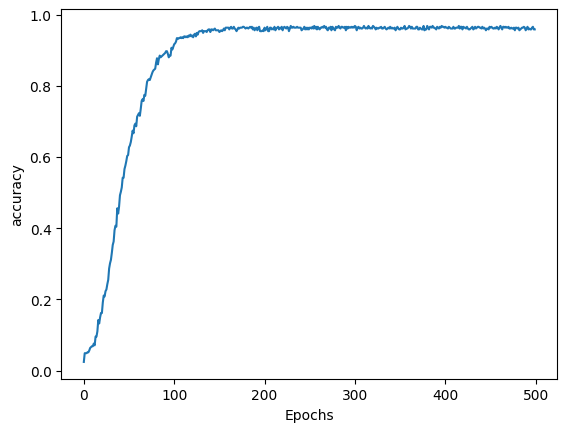

In [49]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [50]:
# Define seed text
seed_text = "Laurence part à dublin"

# Define total words to predict
next_words = 50

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_len_sequence-1, padding='pre')

	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:

		# Look up the word associated with the index.
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result
print(seed_text)

1/1 [==============================] - 0s 29ms/step
Laurence part à dublin apprendre de nouveaux pas pour le bal de lanigan. lanigan. lanigan. lanigan. lanigan. du bacon et du thé, thé, danse. danse. jura finnerty. danse. danse. danse. danse. danse. d'une livre. s'évanouit, s'évanouit, danse. danse. thé, danse. danse. danse. thé, danse. danse. thé, danse. danse. danse. danse. danse. bacon et je


In [51]:
# Define seed text
seed_text = "Laurence part a dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_len_sequence-1, padding='pre')

	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])

  # Sort the probabilities in ascending order
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:

		# Look up the word associated with the index.
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result
print(seed_text)

1/1 [==============================] - 0s 22ms/step
Laurence part a dublin donné une grande fête plus ; garçons les rose. arrivé comme et arrivé d'une rendre et redevenir toutes les tara, danse. joues finnerty. inviter, tomber. jura thé, tara, danse. jura thé, plafond finnerty. s'évanouit, danse. thé, thé, thé, rose. salle à finnerty. mur, bien déclaré inviter, thé, au miss peggy finnerty. allait tomber. danse. moi danse. moi jura danse. moi chanter jura tous au folles et lanigan. de rose. mur, thé, tomber. thé, danse. danse. danse. jura l'ont ses s'évanouit, folles de lanigan. du thé, danse. thé, miss finnerty. s'évanouit, finnerty. danse. bien fille lui kerrigan finnerty. était maquillée, salle
